# Single Layer Perceptron and 1D Data Recognition

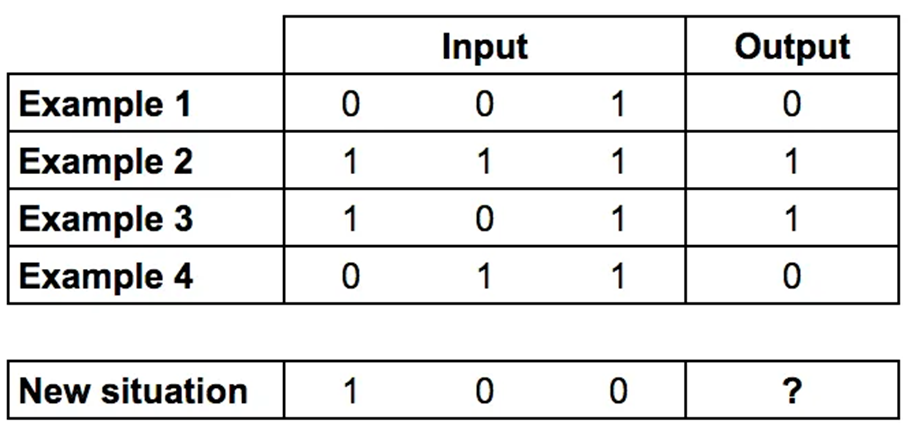



https://www.agiratech.com/how-to-build-a-simple-neural-network-in-9-lines-of-python-code

This is equivalent to a system of equations

<font size="6">
$$
 \begin{cases}
   w_1\cdot 0 + w_2\cdot 0 +w_3\cdot 1  = 0 
   \\
   w_1\cdot 1 + w_2\cdot 1 +w_3\cdot 1  = 1 
   \\
   w_1\cdot 1 + w_2\cdot 0 +w_3\cdot 1  = 1
   \\
   w_1\cdot 0 + w_2\cdot 1 +w_3\cdot 1  = 0
 \end{cases} 
$$
</font>


“Solution”* is $w_1 = 1, w_2 = 0, w_3 = 0$

Output value: $1\cdot 1 + 0\cdot 0 + 0\cdot 0 = 1$

*What if the system does not have an exact solution?

Solving a system of equations using matrices

<font size="6">
$$
 \begin{cases}
   a_{11}\cdot x_1 + a_{12}\cdot x_2 +a_{13}\cdot x_3  = b_1 
   \\
   a_{21}\cdot x_1 + a_{22}\cdot x_2 +a_{23}\cdot x_3  = b_2 
   \\
   a_{31}\cdot x_1 + a_{32}\cdot x_2 +a_{33}\cdot x_3  = b_3
 \end{cases} 
$$

$$
 \begin{pmatrix}
   a_{11}  &  a_{12}  & a_{13}  
   \\
   a_{21}   &  a_{22}  &  a_{23} 
   \\
   a_{31}  &  a_{32}  & a_{33}
 \end{pmatrix} 
 \cdot
 \begin{pmatrix}
   x_1  
   \\
   x_2 
   \\
   x_3
 \end{pmatrix}  
 =
  \begin{pmatrix}
   b_1  
   \\
   b_2 
   \\
   b_3
 \end{pmatrix}   
$$

$$
A = 
\begin{pmatrix}
   a_{11}  &  a_{12}  & a_{13}  
   \\
   a_{21}   &  a_{22}  &  a_{23} 
   \\
   a_{31}  &  a_{32}  & a_{33}
 \end{pmatrix} 
, X = 
\begin{pmatrix}
   x_1  
   \\
   x_2 
   \\
   x_3
 \end{pmatrix}  
, B = 
  \begin{pmatrix}
   b_1  
   \\
   b_2 
   \\
   b_3
 \end{pmatrix}   
$$

$$
A \cdot X = B    
$$

$$
A^{-1} \cdot A \cdot X = A^{-1} \cdot B    
$$

$$
X = A^{-1} \cdot B    
$$
</font>



## Algorithm for finding an approximate solution

1. Create training sets input [[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]] and output [[0], [1], [1], [0]]
1. Set the initial set of weighting coefficients w1, w2 and w3 (let w=[0,0,0])
1. Calculate the output values of the system of equations: input × w
1. Calculate errors: error = input × w − output
1. Calculate the corrections to the weighting coefficients: Delta = input.T × error
1. Calculate the addition of the correction to the weighting coefficients: w += Delta
1. Repeat steps 3-6 the required number of times (until the error is less than required).
1. Calculate the output value based on the obtained weighting coefficients



<font size="6">
$$\sum w_i\cdot x_i = w_1\cdot x_1 + w_2\cdot x_2 +w_3\cdot x_3 $$

$$\frac{1}{1+e^{-\sum w_i\cdot x_i}} $$

$$\Delta = error\cdot input \cdot \frac{\partial f}{\partial x} = (output - f)\cdot input\cdot f\cdot (1-f)$$
</font>

In [3]:
import numpy as np 
training_set_inputs = np.array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]]) 
training_set_outputs = np.array([[0, 1, 1, 0]]).T 
# или training_set_outputs = np.array([[0], [1], [1], [0]])
synaptic_weights = np.array([[0., 0., 0.]]).T 
#synaptic_weights = np.array([[0.], [0.], [0.]]) 
l_rate = 0.3 
trainings = 100

for iteration in range(trainings): 
    output = np.dot(training_set_inputs, synaptic_weights) 
    error = training_set_outputs - output 
    synaptic_weights += np.dot(training_set_inputs.T, l_rate*error) 

test = [1, 0, 0]
print(f'{test=}')
result = np.dot(np.array(test), synaptic_weights)[0] # or .item() instead of [0]
print(f'Final result is {result:.5f}') 
print(f'Final error is {np.sum(np.multiply(error, error)):.5f}') 

test = [0, 0, 1]
print(f'{test=}')
result = np.dot(np.array(test), synaptic_weights)[0] # or .item() instead of [0]
print(f'Final result is {result:.5f}') 
print(f'Final error is {np.sum(np.multiply(error, error)):.5f}') 

test=[1, 0, 0]
Final result is 0.99998
Final error is 0.00000
test=[0, 0, 1]
Final result is -0.00003
Final error is 0.00000


Pay attention to the l_rate coefficient - what happens if you increase it, for example, to 1?

    What result will you get?
    What does this mean, in your opinion?
    What value of l_rate is desirable?

### Neuron and its mathematical model

Neuron and single-layer perceptron

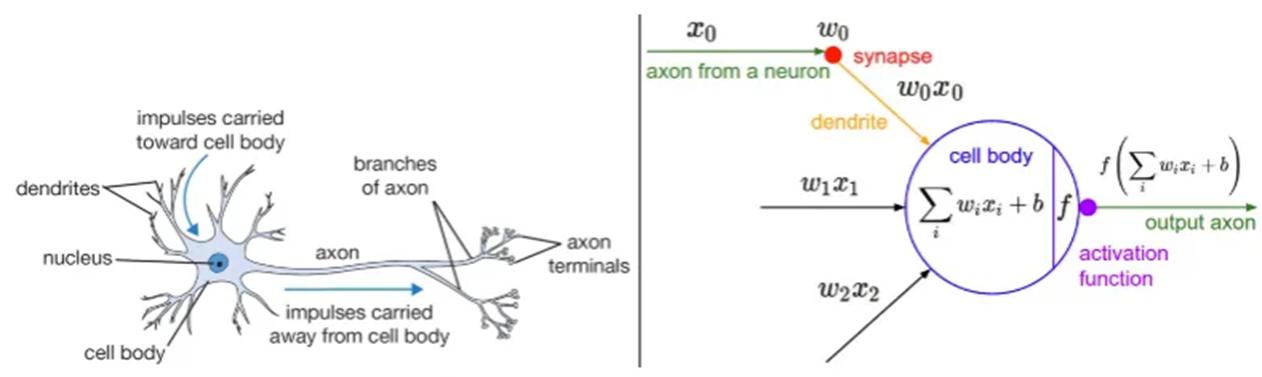



(Activation Functions in DNN - Srijayjk - Medium https://srijayjk.medium.com/activation-functions-in-dnn-21729d529364)

### Activation Function

The activation function fits the range of output values into the interval from 0 to 1.

**Step** function $\left(x = \sum w_i x_i + b \right)$
<font size="6">
\begin{equation}
  f(x)=\begin{cases}
    1, & \text{if $x>0$}.\\
    0, & \text{otherwise}.
  \end{cases}
\end{equation}
</font>

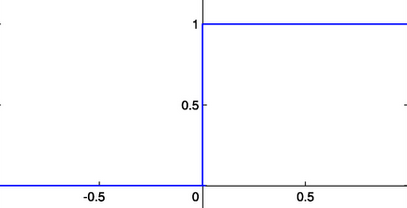

**Logistic (sigmoid)** function

<font size="6">
$$\sigma(x) = \frac{1}{1+e^{-x}},\, \frac {d }{dx}\sigma(x)=\sigma(x)(1-\sigma(x))$$
</font>

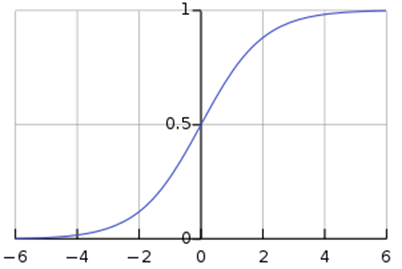


https://en.wikipedia.org/wiki/Artificial_neuron

## Training on a 3x1 array

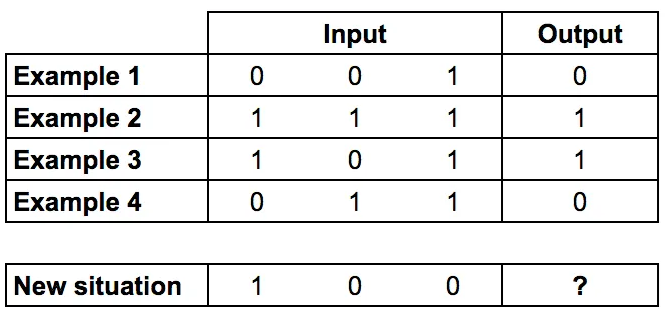

<font size="6">
$$
 \begin{cases}
   w_1\cdot 0 + w_2\cdot 0 +w_3\cdot 1  = 0 
   \\
   w_1\cdot 1 + w_2\cdot 1 +w_3\cdot 1  = 1 
   \\
   w_1\cdot 1 + w_2\cdot 0 +w_3\cdot 1  = 1
   \\
   w_1\cdot 0 + w_2\cdot 1 +w_3\cdot 1  = 0
 \end{cases} 
$$

$$ f = \frac{1}{1+exp(-\sum w_i\cdot x_i)} $$
</font>

(How To Build A Simple Neural Network In 9 Lines of Python Code https://www.agiratech.com/how-to-build-a-simple-neural-network-in-9-lines-of-python-code )

## Алгоритм обучения

1. Create training input and output sets 
2. Set initial weights w1, w2 and w3 ($\sum 𝑤_𝑖\cdot 𝑥_𝑖 = 𝑤_1\cdot 𝑥_1 + 𝑤_2\cdot 𝑥_2 +𝑤_3\cdot 𝑥_3$)
3. Calculate output values
$f = 1/\left(1+e^{-\sum w_i\cdot x_i}\right)$

5. Calculate errors $error = (f − output)$
6. Calculate weight adjustments
$\Delta = input^T \times \left(error\cdot \frac{\partial f}{\partial x}\right) = input^T \times \left( error\cdot f\cdot (1-f) \right)
$
7. w = w + Δ, repeat from step 3.



In [1]:
from numpy import exp, array, random, dot
training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
training_set_outputs = array([[0, 1, 1, 0]]).T
synaptic_weights =  [[0], [0], [0]]
for iteration in range(1000):
    print(f'{synaptic_weights=}') if iteration < 5  else None
    output = 1 / (1 + exp(-(dot(training_set_inputs, synaptic_weights))))
    error = training_set_outputs - output
    synaptic_weights += dot(training_set_inputs.T, error * output * (1 - output))

result = 1 / (1 + exp(-(dot(array([1, 0, 0]), synaptic_weights)))) 
print(f'{result[0]=}')

synaptic_weights=[[0], [0], [0]]
synaptic_weights=array([[0.25],
       [0.  ],
       [0.  ]])
synaptic_weights=array([[ 0.46552657],
       [-0.01723671],
       [-0.03447343]])
synaptic_weights=array([[ 0.65491762],
       [-0.04356582],
       [-0.08957898]])
synaptic_weights=array([[ 0.82567638],
       [-0.07269181],
       [-0.15416115]])
result[0]=np.float64(0.9992980378781284)


### Random weight coefficients

When there are several extremes in the data, the choice of initial coefficients can greatly affect the result. Therefore, a series of trainings are carried out with different sets of input data, choosing those with which the best result is achieved.

Let's consider an example of a one-time generation of random coefficients.

In [5]:
from numpy import exp, array, random, dot
training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
training_set_outputs = array([[0, 1, 1, 0]]).T
random.seed(1)
synaptic_weights = 2 * random.random((3, 1)) - 1
for iteration in range(10000):
    print(f'{synaptic_weights=}') if iteration < 5  else None
    output = 1 / (1 + exp(-(dot(training_set_inputs, synaptic_weights))))
    synaptic_weights += dot(training_set_inputs.T, (training_set_outputs - output) * output * (1 - output))

result =  1 / (1 + exp(-(dot(array([1, 0, 0]), synaptic_weights)))) 
print(result[0])

synaptic_weights=array([[-0.16595599],
       [ 0.44064899],
       [-0.99977125]])
synaptic_weights=array([[ 0.12025406],
       [ 0.50456196],
       [-0.85063774]])
synaptic_weights=array([[ 0.40563039],
       [ 0.54131537],
       [-0.72857311]])
synaptic_weights=array([[ 0.65701265],
       [ 0.53906065],
       [-0.66099969]])
synaptic_weights=array([[ 0.86828909],
       [ 0.50813544],
       [-0.64314383]])
0.9999370428352157


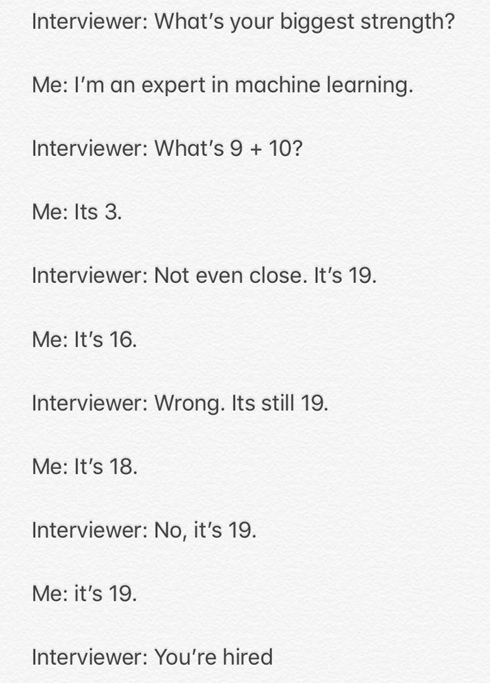

### Array 10х1

In [26]:
training_set_inputs = array([[0.5, 1, 0.5, 0, 0, 0, 0, 0, 0, 0], [0, 0.5, 1, 0.5, 0, 0, 0, 0, 0, 0], 
        [0, 0, 0.5, 1, 0.5, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0.5, 1, 0.5, 0, 0], 
        [0, 0, 0, 0, 0, 0, 0.5, 1, 0.5, 0], [0, 0, 0, 0, 0, 0, 0, 0.5, 1, 0.5]])
training_set_outputs = array([[0, 0, 0, 1, 1, 1]]).T

# [0.5, 1, 0.5, 0, 0, 0, 0, 0, 0, 0]  -> 0
# [0, 0.5, 1, 0.5, 0, 0, 0, 0, 0, 0]  -> 0
# [0, 0, 0.5, 1, 0.5, 0, 0, 0, 0, 0]  -> 0
 
# [0, 0, 0, 0, 0, 0.5, 1, 0.5, 0, 0]  -> 1
# [0, 0, 0, 0, 0, 0, 0.5, 1, 0.5, 0]  -> 1
# [0, 0, 0, 0, 0, 0, 0, 0.5, 1, 0.5]  -> 1

### Hometask:

Using model from this lecture train a model on a set os spectral data.